<a href="https://colab.research.google.com/github/YenLinWu/Daily_Work_of_Data_Science/blob/Dev/Normality_and_Homogeneity_Test/Normality_and_Homogeneity_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 前言  

對於許多的統計方法，例如 : t 檢定、ANOVA、殘差分析(Residual Analysis)等，在運用這些方法時，樣本資料通常需符合一些基本的假設條件，例如 : 樣本數據符合常態分布等。而，**常態性檢定(Normality Test)**與**變異數同質性檢定(Test for Homogeneity of Variance)**係確認這些統計方法適用性的關鍵過程，不僅使我們能正確得套用統計方法，且確保分析結果的準確性。






# <font color="#00dd00">**常態性檢定 Normality Test**</font>

* 目的 : 檢定樣本資料是否來自於理論常態分布的母體(Population)。   
* 假說檢定 :   
  * 虛無假說(Null Hypothesis) $H_0$ : 樣本數據源自於符合理論常態分佈的母體  
  * 對立假說(Alternative Hypothesis) $H_1$ : 樣本數據非源自於符理論合常態分佈的母體   
  
  若 $\text{P Value}< 0.05$，則，拒絕虛無假說 $H_0$，表示樣本資料非源自於符合理論常態分布的母體。

* 常見的常態性檢定 :   
  * **Anderson–Darling Test**  
  * **Shapiro-Wilk Test**  
  * **Kolmogorov-Smirnov Test**


## [**Anderson–Darling Test**](https://en.wikipedia.org/wiki/Anderson%E2%80%93Darling_test)  

* 檢定統計量 :  
  $$A^2 = -N-S \text{，}$$
  其中， $$\displaystyle S = \sum_{i=1}^{N} \frac{(2i-1)}{N}\times\Big[\ln F(Y_i)+ \ln (1-F(Y_{N+1-i})\Big] \text{，}$$</br>
  $Y_i$ 為樣本資料的[順序統計量(Order Statistic)](https://en.wikipedia.org/wiki/Order_statistic)，$F$ 為理論常態分布的[累積分布函數(Cumulative Distribution Function, CDF)](https://en.wikipedia.org/wiki/Cumulative_distribution_function)。

* 檢定統計量 $A^2$ 望小，表示樣本資料源自於理論常態分布的母體。

* $\text{P Value}$ 會受樣本大小所影響，一般而言，當樣本數越大，越容易得到較小的 $\text{P Value}$，也就是說，越大的樣本數越容易拒絕虛無假說 $H_0$。因此，為避免樣本數的影響因素，常態性檢定通常會再搭配[常態機率圖(Normal Probability Plot)](https://en.wikipedia.org/wiki/Normal_probability_plot)，以輔佐判斷樣本資料是否來自於常態分布的母體，如下圖所示，當樣本數據點越貼近斜直線時，表示樣本資料服從常態分布。     
<p align="center">
<img width="350" src="https://upload.wikimedia.org/wikipedia/commons/1/17/Normprob.png">
</p>

Python version: 3.10.12
SciPy version: 1.11.4
NumPy version: 1.25.2
Pandas version: 1.5.3
Matplotlib version: 3.7.1


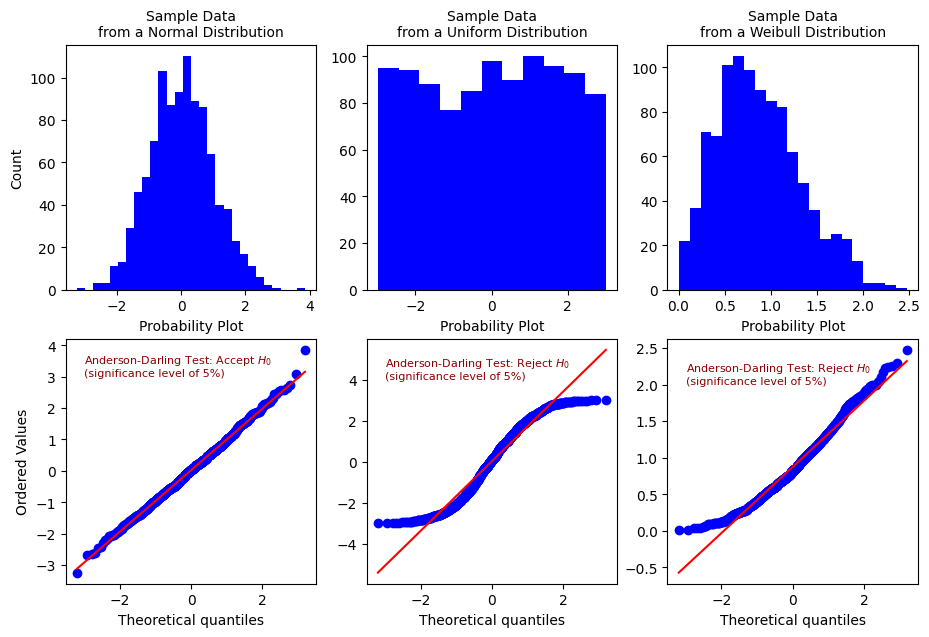

In [ ]:
#@title Python 範例程式碼

#@markdown 在 SciPy 套件中，我們可使用 [```scipy.stats.anderson(x, dist='norm')```](https://docs.scipy.org/doc/scipy-1.11.4/reference/generated/scipy.stats.anderson.html#scipy-stats-anderson)
#@markdown 來進行 Anderson-Darling Test。下面範例為分別從常態(Normal)、均勻(Uniform)與韋伯(Weibull)分布中，隨機抽取 1000 筆數據做為樣本，
#@markdown 再藉由 Anderson-Darling Test 搭配機率圖(Probability Plot)，檢定各抽樣樣本是否符合常態性，如下圖結果所示。

import sys
import os

import scipy
from scipy.stats import anderson, probplot
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

print('Python version:', sys.version[0:7])
print('SciPy version:', scipy.__version__)
print('NumPy version:', np.__version__)
print('Pandas version:', pd.__version__)
print('Matplotlib version:', mpl.__version__)

np.random.seed(42)

### Step 1: 建立樣本數據 ###
# 從理論的常態分布中抽取樣本
mu, sigma = 0, 1
normal_data = np.random.normal(mu, sigma, size=1000)
# 從理論的均勻分布中抽取樣本
uniform_data = np.random.uniform(low=-3, high=3, size=1000)
# 從理論的韋伯分布中抽取樣本
Weibull_data = np.random.weibull(a=2, size=1000)

### Step 2: 不同樣本資料的常態性檢定 ###
distributions = ['Normal', 'Uniform', 'Weibull']
samples = [normal_data, uniform_data, Weibull_data]
test_res = {}
for sample, distr in zip(samples, distributions):
    # Anderson-Darling Test for Normality
    res = anderson(sample, dist='norm')

    # Statistics
    a2_statistics = res.statistic

    # Results
    summary = pd.DataFrame({'critical_values': res.critical_values,
                            'significance_level(%)':res.significance_level})

    summary['result'] = summary['critical_values'].apply(lambda x: 'Reject $H_0$' if a2_statistics>x else 'Accept $H_0$')
    test_res = {distr:summary, **test_res}

### Step 3: 抽樣資料視覺化 ###
plt.figure(figsize=(11, 7))
plt.subplot(231)
plt.hist(normal_data, bins='auto', color='blue')
plt.title('Sample Data\nfrom a Normal Distribution', fontsize=10)
plt.xlabel('')
plt.ylabel('Count')

plt.subplot(234)
probplot(normal_data, plot=plt)
plt.title('Probability Plot', fontsize=10)
plt.text(-3, 3, 'Anderson-Darling Test: '+test_res.get('Normal').loc[2, 'result']+'\n(significance level of 5%)',
         fontdict={'color':'darkred', 'size':8})

plt.subplot(232)
plt.hist(uniform_data, bins='auto', color='blue')
plt.title('Sample Data\nfrom a Uniform Distribution', fontsize=10)
plt.xlabel('')

plt.subplot(235)
probplot(uniform_data, plot=plt)
plt.title('Probability Plot', fontsize=10)
plt.text(-3, 4, 'Anderson-Darling Test: '+test_res.get('Uniform').loc[2, 'result']+'\n(significance level of 5%)',
         fontdict={'color':'darkred', 'size':8})
plt.ylabel('')

plt.subplot(233)
plt.hist(Weibull_data, bins='auto', color='blue')
plt.title('Sample Data\nfrom a Weibull Distribution', fontsize=10)
plt.xlabel('')

plt.subplot(236)
probplot(Weibull_data, plot=plt)
plt.title('Probability Plot', fontsize=10)
plt.text(-3, 2, 'Anderson-Darling Test: '+test_res.get('Weibull').loc[2, 'result']+'\n(significance level of 5%)',
         fontdict={'color':'darkred', 'size':8})
plt.ylabel('')

img_path = 'Anderson_Darling_Test.png'
plt.savefig(img_path, bbox_inches='tight', format='png')

plt.show()

## [**Shapiro-Wilk Test**](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test)  

* 檢定統計量 :  
  $$\displaystyle W = \frac{\displaystyle \bigg(\sum_{i=1}^{N} a_i x_{(i)} \bigg)^2}{\displaystyle \sum_{i=1}^{N} (x_i-\bar{x})^2 } \text{，}$$  </br>
  其中，$x_{(i)}$ 為樣本資料的[順序統計量(Order Statistic)](https://en.wikipedia.org/wiki/Order_statistic)，$\bar{x}$ 為樣本平均數，常數 $a_i$ 係依據理論的常態分布順序統計量的平均數、變異數與共變異數所計算得知。  

* 檢定統計量 $W$ 望小，表示樣本資料源自於理論常態分布的母體。

Python version: 3.10.12
SciPy version: 1.11.4
NumPy version: 1.25.2
Pandas version: 1.5.3
Matplotlib version: 3.7.1


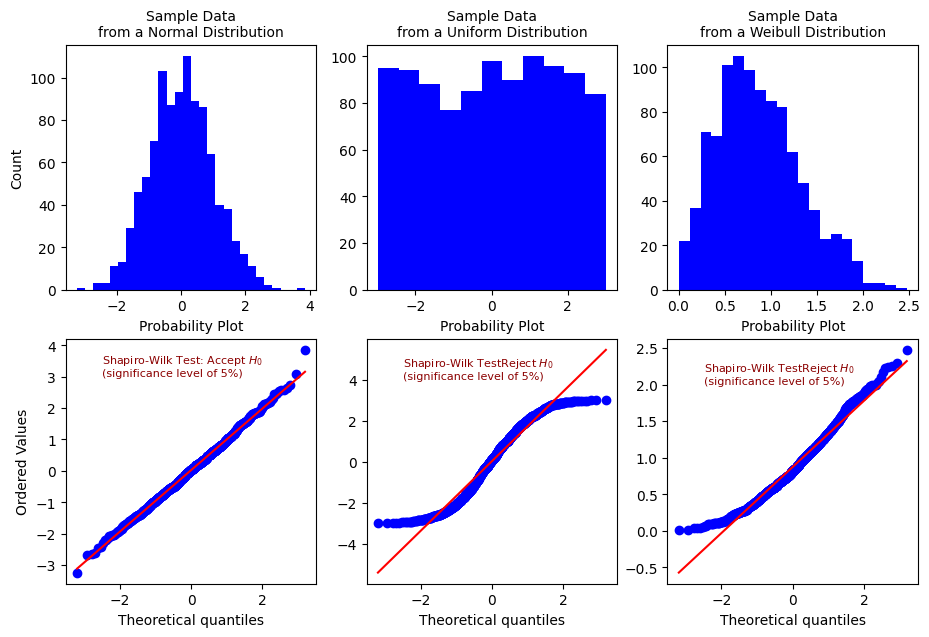

In [ ]:
#@title Python 範例程式碼

#@markdown 在 SciPy 套件中，我們可使用 [```scipy.stats.shapiro(x)```](https://docs.scipy.org/doc/scipy-1.11.4/reference/generated/scipy.stats.shapiro.html#scipy-stats-shapiro)
#@markdown 來進行 Shapiro-Wilk Test。下面範例為分別從常態(Normal)、均勻(Uniform)與韋伯(Weibull)分布中，隨機抽取 1000 筆數據做為樣本，
#@markdown 再藉由 Anderson-Darling Test 搭配機率圖(Probability Plot)，檢定各抽樣樣本是否符合常態性，如下圖結果所示。

import sys
import os

import scipy
from scipy.stats import shapiro, probplot
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

print('Python version:', sys.version[0:7])
print('SciPy version:', scipy.__version__)
print('NumPy version:', np.__version__)
print('Pandas version:', pd.__version__)
print('Matplotlib version:', mpl.__version__)

np.random.seed(42)

### Step 1: 建立樣本數據 ###
# 從理論的常態分布中抽取樣本
mu, sigma = 0, 1
normal_data = np.random.normal(mu, sigma, size=1000)
# 從理論的均勻分布中抽取樣本
uniform_data = np.random.uniform(low=-3, high=3, size=1000)
# 從理論的韋伯分布中抽取樣本
Weibull_data = np.random.weibull(a=2, size=1000)

### Step 2: 不同樣本資料的常態性檢定 ###
distributions = ['Normal', 'Uniform', 'Weibull']
samples = [normal_data, uniform_data, Weibull_data]
test_res = {}
for sample, distr in zip(samples, distributions):
    # Shapiro-Wilk Test for Normality
    res = shapiro(sample)

    # Statistics and P Value
    w_statistics = res.statistic
    p = res.pvalue

    # Results
    summary = pd.DataFrame({'statistics': [w_statistics], 'p_value': [p]})
    summary['result'] = summary['p_value'].apply(lambda x: 'Reject $H_0$' if x<0.05 else 'Accept $H_0$')
    test_res = {distr:summary, **test_res}

### Step 3: 抽樣資料視覺化 ###
plt.figure(figsize=(11, 7))
plt.subplot(231)
plt.hist(normal_data, bins='auto', color='blue')
plt.title('Sample Data\nfrom a Normal Distribution', fontsize=10)
plt.xlabel('')
plt.ylabel('Count')

plt.subplot(234)
probplot(normal_data, plot=plt)
plt.title('Probability Plot', fontsize=10)
plt.text(-2.5, 3, 'Shapiro-Wilk Test: '+test_res.get('Normal').loc[0, 'result']+'\n(significance level of 5%)',
         fontdict={'color':'darkred', 'size':8})

plt.subplot(232)
plt.hist(uniform_data, bins='auto', color='blue')
plt.title('Sample Data\nfrom a Uniform Distribution', fontsize=10)
plt.xlabel('')

plt.subplot(235)
probplot(uniform_data, plot=plt)
plt.title('Probability Plot', fontsize=10)
plt.text(-2.5, 4, 'Shapiro-Wilk Test'+test_res.get('Uniform').loc[0, 'result']+'\n(significance level of 5%)',
         fontdict={'color':'darkred', 'size':8})
plt.ylabel('')

plt.subplot(233)
plt.hist(Weibull_data, bins='auto', color='blue')
plt.title('Sample Data\nfrom a Weibull Distribution', fontsize=10)
plt.xlabel('')

plt.subplot(236)
probplot(Weibull_data, plot=plt)
plt.title('Probability Plot', fontsize=10)
plt.text(-2.5, 2, 'Shapiro-Wilk Test'+test_res.get('Weibull').loc[0, 'result']+'\n(significance level of 5%)',
         fontdict={'color':'darkred', 'size':8})
plt.ylabel('')

img_path = 'Shapiro_Wilk_Test.png'
plt.savefig(img_path, bbox_inches='tight', format='png')

plt.show()

## [**Kolmogorov-Smirnov Test**](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test)  

* 係一種[無母數統計檢定(Nonparametric Statistics)](https://en.wikipedia.org/wiki/Nonparametric_statistics)，主要係藉由比較樣本資料與理論分布的[累積分布函數(Cumulative Distribution Function, CDF)](https://en.wikipedia.org/wiki/Cumulative_distribution_function)，計算兩 CDF 之間的最大差距，來檢定樣本資料是否源自於理論分布的母體。  

* 檢定統計量 :
  $$D = \max_{1\leq i\leq N} \bigg\lvert F_{empirical}(x_i) - F(x_i) \bigg\rvert \text{，}$$ </br>
  其中， $ F_{empirical}$ 為[經驗分布函數(Empirical Distribution Function)](https://en.wikipedia.org/wiki/Empirical_distribution_function)，$F$ 為理論的累積分布函數(Cumulative Distribution Function, CDF)。  

  <p align="center">
  <img width="350" src="https://upload.wikimedia.org/wikipedia/commons/3/3f/KS2_Example.png">
  </p>

* 檢定統計量 $D$ 望小，表示樣本資料源自於理論分布的母體。  

* 在實務中，Kolmogorov-Smirnov Test 相較於其它常態性檢定方法，其需要相對大量的樣本資料，才能正確拒絕虛無假說 $H_0$。  
  > In practice, the statistic requires a relatively large number of data points (in comparison to other goodness of fit criteria such as the Anderson–Darling test statistic) to properly reject the null hypothesis.  

  🔗 資料來源 : [Kolmogorov–Smirnov Test](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test) was last edited on  24 February 2024, at 23:03 (UTC), in Wikipedia.



Python version: 3.10.12
SciPy version: 1.11.4
NumPy version: 1.25.2
Pandas version: 1.5.3
Matplotlib version: 3.7.1


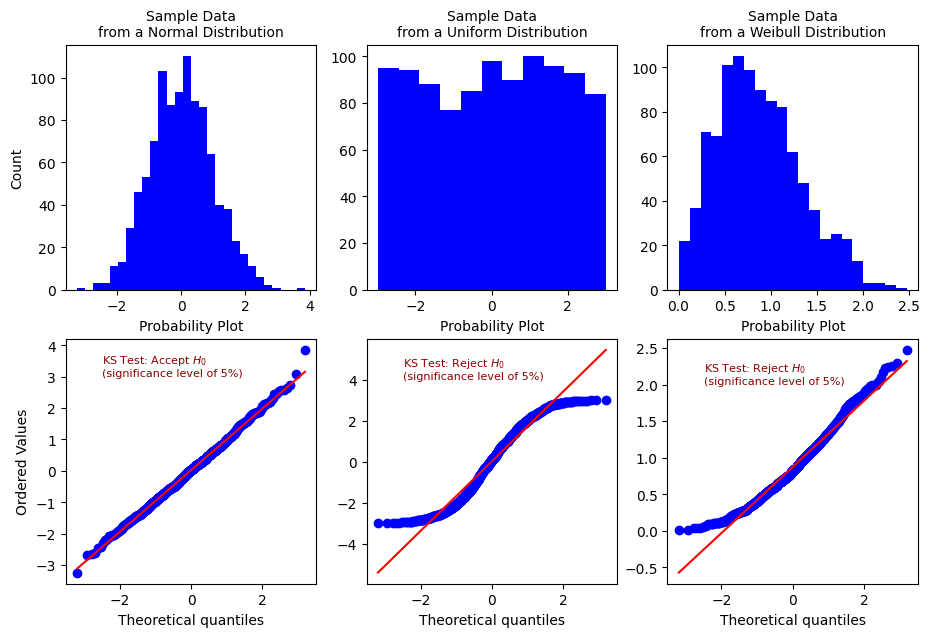

In [ ]:
#@title Python 範例程式碼

#@markdown 在 SciPy 套件中，我們可使用 [```scipy.stats.kstest(x, cdf=stats.norm.cdf)```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html#scipy-stats-kstest)
#@markdown 來進行 Kolmogorov-Smirnov Test。下面範例為分別從常態(Normal)、均勻(Uniform)與韋伯(Weibull)分布中，隨機抽取 1000 筆數據做為樣本，
#@markdown 再藉由 Anderson-Darling Test 搭配機率圖(Probability Plot)，檢定各抽樣樣本是否符合常態性，如下圖結果所示。

import sys
import os

import scipy
from scipy.stats import kstest, probplot
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

print('Python version:', sys.version[0:7])
print('SciPy version:', scipy.__version__)
print('NumPy version:', np.__version__)
print('Pandas version:', pd.__version__)
print('Matplotlib version:', mpl.__version__)

np.random.seed(42)

### Step 1: 建立樣本數據 ###
# 從理論的常態分布中抽取樣本
mu, sigma = 0, 1
normal_data = np.random.normal(mu, sigma, size=1000)
# 從理論的均勻分布中抽取樣本
uniform_data = np.random.uniform(low=-3, high=3, size=1000)
# 從理論的韋伯分布中抽取樣本
Weibull_data = np.random.weibull(a=2, size=1000)

### Step 2: 不同樣本資料的常態性檢定 ###
distributions = ['Normal', 'Uniform', 'Weibull']
samples = [normal_data, uniform_data, Weibull_data]
test_res = {}
for sample, distr in zip(samples, distributions):
    # Kolmogorov-Smirnov Test for Normality
    res = kstest(sample, scipy.stats.norm.cdf)

    # Statistics and P Value
    w_statistics = res.statistic
    p = res.pvalue

    # Results
    summary = pd.DataFrame({'statistics': [w_statistics], 'p_value': [p]})
    summary['result'] = summary['p_value'].apply(lambda x: 'Reject $H_0$' if x<0.05 else 'Accept $H_0$')
    test_res = {distr:summary, **test_res}

### Step 3: 抽樣資料視覺化 ###
plt.figure(figsize=(11, 7))
plt.subplot(231)
plt.hist(normal_data, bins='auto', color='blue')
plt.title('Sample Data\nfrom a Normal Distribution', fontsize=10)
plt.xlabel('')
plt.ylabel('Count')

plt.subplot(234)
probplot(normal_data, plot=plt)
plt.title('Probability Plot', fontsize=10)
plt.text(-2.5, 3, 'KS Test: '+test_res.get('Normal').loc[0, 'result']+'\n(significance level of 5%)',
         fontdict={'color':'darkred', 'size':8})

plt.subplot(232)
plt.hist(uniform_data, bins='auto', color='blue')
plt.title('Sample Data\nfrom a Uniform Distribution', fontsize=10)
plt.xlabel('')

plt.subplot(235)
probplot(uniform_data, plot=plt)
plt.title('Probability Plot', fontsize=10)
plt.text(-2.5, 4, 'KS Test: '+test_res.get('Uniform').loc[0, 'result']+'\n(significance level of 5%)',
         fontdict={'color':'darkred', 'size':8})
plt.ylabel('')

plt.subplot(233)
plt.hist(Weibull_data, bins='auto', color='blue')
plt.title('Sample Data\nfrom a Weibull Distribution', fontsize=10)
plt.xlabel('')

plt.subplot(236)
probplot(Weibull_data, plot=plt)
plt.title('Probability Plot', fontsize=10)
plt.text(-2.5, 2, 'KS Test: '+test_res.get('Weibull').loc[0, 'result']+'\n(significance level of 5%)',
         fontdict={'color':'darkred', 'size':8})
plt.ylabel('')

img_path = 'Kolmogorov_Smirnov_Test.png'
plt.savefig(img_path, bbox_inches='tight', format='png')

plt.show()

# <font color="#00dd00">**變異數同質性檢定 Test for Homogeneity of Variance**</font>  

* 目的 : 檢定多組(2組以上)樣本資料的變異數 Variance 是否齊次(或稱同質 Homogeneity)，換句話說，檢定多組樣本的變異數是否完全相等。  
* 假說檢定 :   
  * 虛無假說(Null Hypothesis) $H_0$ : 各組樣本數據的變異數皆相等  
  * 對立假說(Alternative Hypothesis) $H_1$ : 各組樣本數據的變異數不完全相等   
  
  若 $\text{P Value}< 0.05$，則，拒絕虛無假說 $H_0$，表示各組樣本的變異數不完全相等。   

* 常見的變異數同質性檢定 :   
  * **Bartlett’s Test**  
  * **Levene Test**  
  * [**Brown–Forsythe Test**](https://en.wikipedia.org/wiki/Brown%E2%80%93Forsythe_test)


* **Bartlett’s Test**、**Levene Test** 與 **Brown–Forsythe Test** 三種檢定方法的差異 :  
  * Bartlett’s Test 對於非常態分布的數據較為敏感，換句話說，如果樣本資料來自非常態分布，則，Bartlett’s Test 可能只在檢定非常態性。  
  > Bartlett's test is sensitive to departures from normality. That is, if the samples come from non-normal distributions, then Bartlett's test may simply be testing for non-normality.  

    🔗 資料來源 : [Bartlett's test](https://en.wikipedia.org/wiki/Bartlett%27s_test) was last edited on 6 February 2023, at 22:47 (UTC), in Wikipedia.
  * Bartlett’s Test 較適用在樣本資料符合常態分佈的前提下，因此，當樣本資料與常態分布有顯著偏差時，通常傾向採用 Levene Test 或 Brown–Forsythe Test 來檢定變異數的同質性。
  * Levene Test 與 Brown–Forsythe Test 兩者在計算統計量的變數轉換方式不同，Levene Test 係採用各組數據的平均數來計算偏差，Brown–Forsythe Test 則係採用各組數據的中位數來計算偏差。因此，相較於 Levene Test，Brown–Forsythe Test 的檢定結果通常較為穩健(Robust)。  
  在 SciPy 套件中，[`scipy.stats.levene(*samples, center='median')`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html#scipy-stats-levene) 函數可用來進行 Levene Test 與 Brown–Forsythe Test，其中， 藉由設定 `center` 參數來決定使用哪一種檢定方法，請參考下列 Python 範例程式碼 :   
  ``` python
  >>> from scipy.stats import levene
  >>>
  >>> # Brown–Forsythe Test
  >>> statistic, p_value = levene(sample_1, sample_2, sample_3, center='median')
  >>>
  >>> # Levene Test
  >>> statistic, p_value = levene(sample_1, sample_2, sample_3,center='mean')  
  ```  

  * 在大多數情況下，Brown–Forsythe Test 被認為與其他的方差檢定法來得一樣更好些。 然而，在 Glass 與 Hopkins 的論文(1996 p. 436)中，他們指出 Levene Test 和 Brown–Forsythe Test 有「致命缺陷」； 當變異數存在顯著差異且樣本大小不相等時，尚不清楚它們的穩健性如何，建議可使用非參數的方法重複檢定。

    > For the most part, the B-F test is thought to perform as well as or better than other available tests for equal variances. However, Glass and Hopkins (1996 p. 436) state that the Levene and B-F tests are “fatally flawed”; It isn’t clear how robust they are when there is significant differences in variances and unequal sample sizes. Hill et. al (2006) advise repeating the test using a non-parametric method.   

     🔗 資料來源 : [Brown-Forsythe Test: Definition](https://www.statisticshowto.com/brown-forsythe-test/), in Statistics How To.


Python version: 3.10.12
SciPy version: 1.11.4
NumPy version: 1.25.2
Pandas version: 1.5.3
Matplotlib version: 3.7.1

Bartlett’s Test: Reject null hypothesis with significance level of 5%

Levene Test: Reject null hypothesis with significance level of 5%

Brown–Forsythe Test: Reject null hypothesis with significance level of 5%


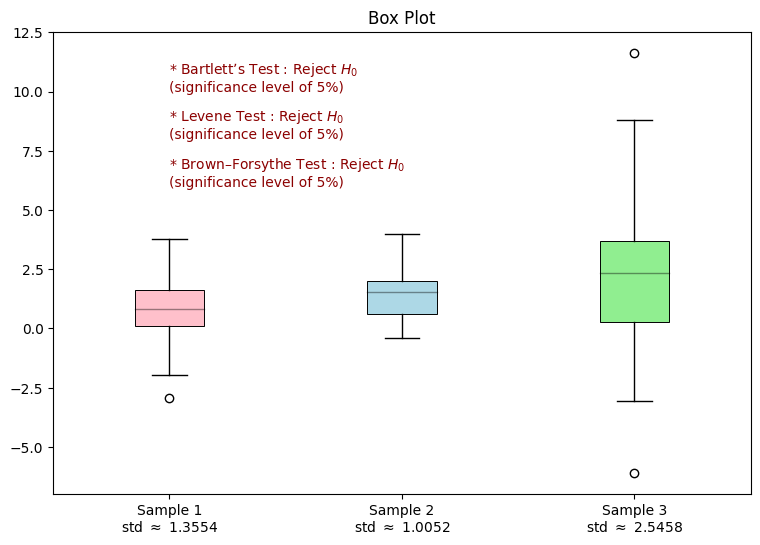

In [ ]:
#@title Python 範例程式碼

#@markdown 在 SciPy 套件中，分別可使用 [```scipy.stats.bartlett(*samples)```](https://docs.scipy.org/doc/scipy-1.11.4/reference/generated/scipy.stats.bartlett.html#scipy.stats.bartlett) 與 [```scipy.stats.levene(*samples)```](https://docs.scipy.org/doc/scipy-1.11.4/reference/generated/scipy.stats.levene.html#scipy-stats-levene) 進行變異數同質性檢定。</br>
#@markdown 在下圖範例中，三組樣本資料係分別從不同的平均數與標準差的常態(Normal)分布中，隨機抽取 100、50、150 筆數據做為樣本，且利用上述的三種檢定方法(Bartlett’s Test、Levene Test 與 Brown–Forsythe Test)，進行變異數同質性的檢定，三種方法的推論皆拒絕虛無假說 $H_0$。
#@markdown

import sys
import os

import scipy
from scipy.stats import bartlett, levene
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

print('Python version:', sys.version[0:7])
print('SciPy version:', scipy.__version__)
print('NumPy version:', np.__version__)
print('Pandas version:', pd.__version__)
print('Matplotlib version:', mpl.__version__)

np.random.seed(42)

### Step 1: 建立三組樣本數據 ###
sample_1 = np.random.normal(1, 1.5, size=100)
sample_2 = np.random.normal(1.5, 1, size=50)
sample_3 = np.random.normal(2, 2.5, size=150)
std_1 = sample_1.std()
std_2 = sample_2.std()
std_3 = sample_3.std()

### Step 2: 變異數的同質性檢定 ###
# Bartlett’s Test for Homogeneity
res = bartlett(sample_1, sample_2, sample_3)
if res.pvalue < 0.05:
    inference_of_Bartlett = '* Bartlett’s Test : Reject $H_0$\n(significance level of 5%)'
    print('\nBartlett’s Test: Reject null hypothesis with significance level of 5%')
else:
    inference_of_Bartlett = '* Bartlett’s Test : Accept $H_0$\n(significance level of 5%)'
    print('\nBartlett’s Test: Not reject null hypothesis with significance level of 5%')

# Levene Test for Homogeneity
res = levene(sample_1, sample_2, sample_3, center='mean')
if res.pvalue < 0.05:
    inference_of_Levene = '* Levene Test : Reject $H_0$\n(significance level of 5%)'
    print('\nLevene Test: Reject null hypothesis with significance level of 5%')
else:
    inference_of_Levene = '* Levene Test : Accept $H_0$\n(significance level of 5%)'
    print('\nBLevene Test: Not reject null hypothesis with significance level of 5%')

# Brown–Forsythe Test for Homogeneity
res = levene(sample_1, sample_2, sample_3, center='median')
if res.pvalue < 0.05:
    inference_of_BrownForsythe = '* Brown–Forsythe Test : Reject $H_0$\n(significance level of 5%)'
    print('\nBrown–Forsythe Test: Reject null hypothesis with significance level of 5%')
else:
    inference_of_BrownForsythe = '* Brown–Forsythe Test : Accept $H_0$\n(significance level of 5%)'
    print('\nBrown–Forsythe Test: Not reject null hypothesis with significance level of 5%')

### Step 3: 各組樣本資料的分布(盒鬚圖) ###
all_sample = [sample_1, sample_2, sample_3]
labels = ['Sample 1'+'\nstd $\\approx$ '+str(np.round(std_1, 4)),
          'Sample 2'+'\nstd $\\approx$ '+str(np.round(std_2, 4)),
          'Sample 3'+'\nstd $\\approx$ '+str(np.round(std_3, 4))]
plt.figure(figsize=(9, 6))
bp = plt.boxplot(all_sample, patch_artist=True, medianprops=dict(color='black', alpha=0.4),
                 labels=labels)

colors = ['pink', 'lightblue', 'lightgreen']
for box, color in zip(bp['boxes'], colors):
    box.set(facecolor=color)
    box.set(edgecolor='black', linewidth=0.7)

plt.title('Box Plot')
plt.text(1, 10, inference_of_Bartlett,
         fontdict={'color':'darkred', 'size':10})
plt.text(1, 8, inference_of_Levene,
         fontdict={'color':'darkred', 'size':10})
plt.text(1, 6, inference_of_BrownForsythe,
         fontdict={'color':'darkred', 'size':10})

img_path = 'Tset_for_Homogeneity_of_Normal_Sample_with_different_variance.png'
plt.savefig(img_path, bbox_inches='tight', format='png')

plt.show()


Bartlett’s Test: Not reject null hypothesis with significance level of 5%

BLevene Test: Not reject null hypothesis with significance level of 5%

Brown–Forsythe Test: Not reject null hypothesis with significance level of 5%


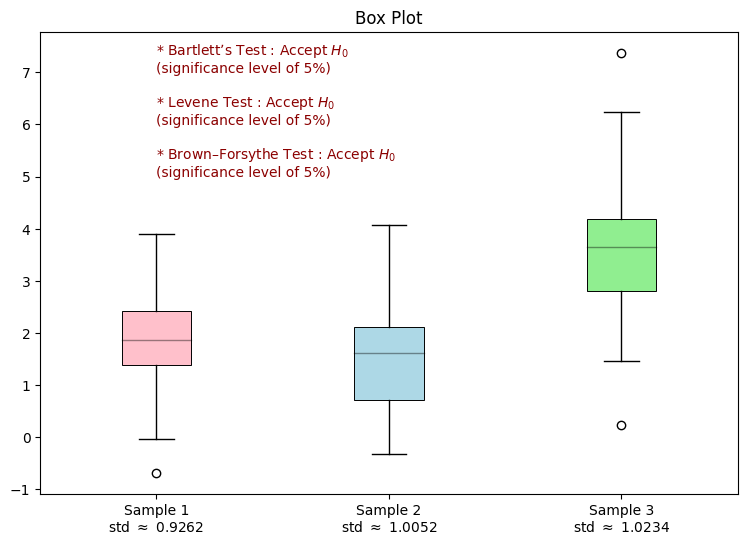

In [ ]:
#@markdown 在下圖範例中，三組樣本資料的抽樣，係分別從不同的平均數但十分相近的標準差的常態(Normal)分布中，分別隨機抽取 100、50、150 筆數據做為樣本，其變異數同質性檢定的結果，三種方法的推論皆不拒絕虛無假說 $H_0$，也就是說，三組樣本資料的變異數皆相同。

np.random.seed(42)

### Step 1: 建立三組樣本數據 ###
sample_1 = np.random.normal(2, 1.025, size=100)
sample_2 = np.random.normal(1.6, 1, size=50)
sample_3 = np.random.normal(3.5, 1.005, size=150)
std_1 = sample_1.std()
std_2 = sample_2.std()
std_3 = sample_3.std()

### Step 2: 變異數的同質性檢定 ###
# Bartlett’s Test for Homogeneity
res = bartlett(sample_1, sample_2, sample_3)
if res.pvalue < 0.05:
    inference_of_Bartlett = '* Bartlett’s Test : Reject $H_0$\n(significance level of 5%)'
    print('\nBartlett’s Test: Reject null hypothesis with significance level of 5%')
else:
    inference_of_Bartlett = '* Bartlett’s Test : Accept $H_0$\n(significance level of 5%)'
    print('\nBartlett’s Test: Not reject null hypothesis with significance level of 5%')

# Levene Test for Homogeneity
res = levene(sample_1, sample_2, sample_3, center='mean')
if res.pvalue < 0.05:
    inference_of_Levene = '* Levene Test : Reject $H_0$\n(significance level of 5%)'
    print('\nLevene Test: Reject null hypothesis with significance level of 5%')
else:
    inference_of_Levene = '* Levene Test : Accept $H_0$\n(significance level of 5%)'
    print('\nBLevene Test: Not reject null hypothesis with significance level of 5%')

# Brown–Forsythe Test for Homogeneity
res = levene(sample_1, sample_2, sample_3, center='median')
if res.pvalue < 0.05:
    inference_of_BrownForsythe = '* Brown–Forsythe Test : Reject $H_0$\n(significance level of 5%)'
    print('\nBrown–Forsythe Test: Reject null hypothesis with significance level of 5%')
else:
    inference_of_BrownForsythe = '* Brown–Forsythe Test : Accept $H_0$\n(significance level of 5%)'
    print('\nBrown–Forsythe Test: Not reject null hypothesis with significance level of 5%')

### Step 3: 各組樣本資料的分布(盒鬚圖) ###
all_sample = [sample_1, sample_2, sample_3]
labels = ['Sample 1'+'\nstd $\\approx$ '+str(np.round(std_1, 4)),
          'Sample 2'+'\nstd $\\approx$ '+str(np.round(std_2, 4)),
          'Sample 3'+'\nstd $\\approx$ '+str(np.round(std_3, 4))]
plt.figure(figsize=(9, 6))
bp = plt.boxplot(all_sample, patch_artist=True, medianprops=dict(color='black', alpha=0.4),
                 labels=labels)

colors = ['pink', 'lightblue', 'lightgreen']
for box, color in zip(bp['boxes'], colors):
    box.set(facecolor=color)
    box.set(edgecolor='black', linewidth=0.7)

plt.title('Box Plot')
plt.text(1, 7, inference_of_Bartlett,
         fontdict={'color':'darkred', 'size':10})
plt.text(1, 6, inference_of_Levene,
         fontdict={'color':'darkred', 'size':10})
plt.text(1, 5, inference_of_BrownForsythe,
         fontdict={'color':'darkred', 'size':10})

img_path = 'Tset_for_Homogeneity_of_Normal_Samples_with_close_variance.png'
plt.savefig(img_path, bbox_inches='tight', format='png')

plt.show()


Bartlett’s Test: Reject null hypothesis with significance level of 5%

Levene Test: Reject null hypothesis with significance level of 5%

Brown–Forsythe Test: Not reject null hypothesis with significance level of 5%


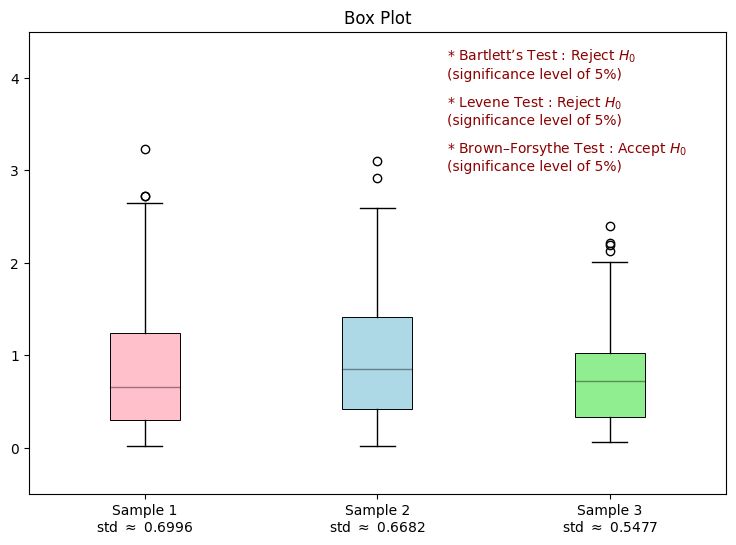

In [ ]:
#@markdown 在下圖範例中，三組樣本資料的抽樣，係分別從不同且相近的韋伯(Weibull)分布中，分別隨機抽取 110、170、100 筆數據做為樣本，三種方法對其變異數同質性檢定的結果不完全相同，只有 Brown–Forsythe Test 的推論為不拒絕虛無假說 $H_0$。

np.random.seed(42)

### Step 1: 建立三組樣本數據 ###
sample_1 = np.random.weibull(1.25, size=110)
sample_2 = np.random.weibull(1.35, size=170)
sample_3 = np.random.weibull(1.5, size=100)
std_1 = sample_1.std()
std_2 = sample_2.std()
std_3 = sample_3.std()

### Step 2: 變異數的同質性檢定 ###
# Bartlett’s Test for Homogeneity
res = bartlett(sample_1, sample_2, sample_3)
if res.pvalue < 0.05:
    inference_of_Bartlett = '* Bartlett’s Test : Reject $H_0$\n(significance level of 5%)'
    print('\nBartlett’s Test: Reject null hypothesis with significance level of 5%')
else:
    inference_of_Bartlett = '* Bartlett’s Test : Accept $H_0$\n(significance level of 5%)'
    print('\nBartlett’s Test: Not reject null hypothesis with significance level of 5%')

# Levene Test for Homogeneity
res = levene(sample_1, sample_2, sample_3, center='mean')
if res.pvalue < 0.05:
    inference_of_Levene = '* Levene Test : Reject $H_0$\n(significance level of 5%)'
    print('\nLevene Test: Reject null hypothesis with significance level of 5%')
else:
    inference_of_Levene = '* Levene Test : Accept $H_0$\n(significance level of 5%)'
    print('\nBLevene Test: Not reject null hypothesis with significance level of 5%')

# Brown–Forsythe Test for Homogeneity
res = levene(sample_1, sample_2, sample_3, center='median')
if res.pvalue < 0.05:
    inference_of_BrownForsythe = '* Brown–Forsythe Test : Reject $H_0$\n(significance level of 5%)'
    print('\nBrown–Forsythe Test: Reject null hypothesis with significance level of 5%')
else:
    inference_of_BrownForsythe = '* Brown–Forsythe Test : Accept $H_0$\n(significance level of 5%)'
    print('\nBrown–Forsythe Test: Not reject null hypothesis with significance level of 5%')

### Step 3: 各組樣本資料的分布(盒鬚圖) ###
all_sample = [sample_1, sample_2, sample_3]
labels = ['Sample 1'+'\nstd $\\approx$ '+str(np.round(std_1, 4)),
          'Sample 2'+'\nstd $\\approx$ '+str(np.round(std_2, 4)),
          'Sample 3'+'\nstd $\\approx$ '+str(np.round(std_3, 4))]
plt.figure(figsize=(9, 6))
bp = plt.boxplot(all_sample, patch_artist=True, medianprops=dict(color='black', alpha=0.4),
                 labels=labels)

colors = ['pink', 'lightblue', 'lightgreen']
for box, color in zip(bp['boxes'], colors):
    box.set(facecolor=color)
    box.set(edgecolor='black', linewidth=0.7)

plt.ylim([-0.5, 4.5])
plt.title('Box Plot')
plt.text(2.3, 4, inference_of_Bartlett,
         fontdict={'color':'darkred', 'size':10})
plt.text(2.3, 3.5, inference_of_Levene,
         fontdict={'color':'darkred', 'size':10})
plt.text(2.3, 3, inference_of_BrownForsythe,
         fontdict={'color':'darkred', 'size':10})

img_path = 'Tset_for_Homogeneity_of_Nonnormal_Samples.png'
plt.savefig(img_path, bbox_inches='tight', format='png')

plt.show()

# 參考文獻

* [Levene Test](https://datatab.net/tutorial/levene-test) in [DATAtab](https://datatab.net/).
* [Brown-Forsythe Test: Definition](https://www.statisticshowto.com/brown-forsythe-test/) in Statistics How To.  

